## Movie Reviews- Canvsd Discussion Assignment 3

SVM -> SVC, Logistic Regression, SGD training
Show the effect of 5 alterations (including default value) on a margin size parameter (alpha value within SGDClassifier)

In [1]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

### IMPORTANT!!! Make sure you are using `BinaryClassificationPerformance` v1.02

In [2]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

# Function for feature building and extraction on natural language data

Applying Count Vectorizer + Adding other features

In [3]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

        
    # Count vectorizer
    if (not test): #fit_transform()
        cv = CountVectorizer(analyzer = 'word', ngram_range=(1,2))
        cv = CountVectorizer()
        X_cv = cv.fit_transform(movie_data['review'])
        fitted_transformations.append(cv)
        print("Shape of CountVectorizer X:")
        print(X_cv.shape)
    else: # transform() 
        X_cv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of CountVectorizer X:")
        print(X_cv.shape)
        cv.get_feature_names_out()
        

    if (not test): #Tfidf
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_cv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_cv)
    
    
    # create additional quantitative features
    # features from .csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")
    movie_data['punc_count_2'] = movie_data['review'].str.count("\!")
    #movie_data['all_caps'] = movie_data['review'].str.isupper().astype(int)
 
    
    # next on the list to do: count all the words that aren't all caps? 
    # could be helpful to look into [all caps / total number of reviews]


    X_quant_features = movie_data[["word_count", "punc_count","punc_count_2"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[5].transform(X_matrix)
        print(X.shape)
    
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

# Create training and test sets from function

## Changed my random seed to 32

In [4]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='moviereviews_train.tsv', my_random_seed=32)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of CountVectorizer X:
(25000, 74849)
Look at a few rows of the new quantitative features: 
   word_count  punc_count  punc_count_2
0         433          20             1
1         158          16             0
2         378          20             0

# Fit (and tune) Various Models


### MODEL: SGDC Classifier

In [5]:
from sklearn.linear_model import SGDClassifier 
from sklearn.pipeline import make_pipeline

sgd = SGDClassifier(alpha=0.001, max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)

sgd_performance_train = BinaryClassificationPerformance(sgd.predict(X_train), y_train, 'sgd_train')
sgd_performance_train.compute_measures()

print(sgd_performance_train.performance_measures)


{'Pos': 10006, 'Neg': 9994, 'TP': 10006, 'TN': 9994, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'sgd_train'}


In [6]:
#Trying to put all alpha values in at once rather than in 5 separate cells for code efficiency and cleanliness

from sklearn.linear_model import SGDClassifier 

n_alphas = [.001, 1, 10, 100, 1000]
performance_measures = []
sgd_testing = []

for n in n_alphas:
    sgd = SGDClassifier(alpha=n)
    sgd.fit(X_train, y_train)
    
    sgd_performance_train = BinaryClassificationPerformance(sgd.predict(X_train), y_train, 'sgd_train' + str(n))
    sgd_performance_train.compute_measures()
    performance_measures.append(sgd_performance_train)
    sgd_testing.append(sgd)
    
    print(sgd_performance_train.performance_measures)

{'Pos': 10006, 'Neg': 9994, 'TP': 10005, 'TN': 9994, 'FP': 0, 'FN': 1, 'Accuracy': 0.99995, 'Precision': 1.0, 'Recall': 0.9999000599640215, 'desc': 'sgd_train0.001'}
{'Pos': 10006, 'Neg': 9994, 'TP': 9980, 'TN': 9977, 'FP': 17, 'FN': 26, 'Accuracy': 0.99785, 'Precision': 0.998299489846954, 'Recall': 0.9974015590645613, 'desc': 'sgd_train1'}
{'Pos': 10006, 'Neg': 9994, 'TP': 9583, 'TN': 9836, 'FP': 158, 'FN': 423, 'Accuracy': 0.97095, 'Precision': 0.9837798993943127, 'Recall': 0.9577253647811313, 'desc': 'sgd_train10'}
{'Pos': 10006, 'Neg': 9994, 'TP': 8672, 'TN': 9864, 'FP': 130, 'FN': 1334, 'Accuracy': 0.9268, 'Precision': 0.9852306294024086, 'Recall': 0.8666799920047972, 'desc': 'sgd_train100'}
{'Pos': 10006, 'Neg': 9994, 'TP': 9335, 'TN': 9631, 'FP': 363, 'FN': 671, 'Accuracy': 0.9483, 'Precision': 0.9625696019797897, 'Recall': 0.932940235858485, 'desc': 'sgd_train1000'}


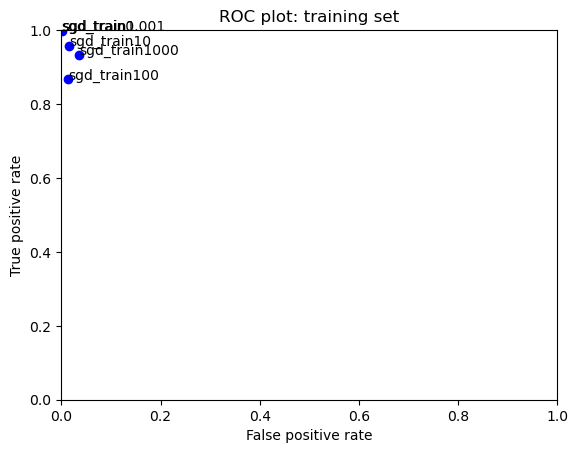

In [7]:
for fit in performance_measures:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: training set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [8]:
sgd_performance_test = BinaryClassificationPerformance(sgd.predict(X_test), y_test, 'sgd_test')
sgd_performance_test.compute_measures()
print(sgd_performance_test.performance_measures)

{'Pos': 2494, 'Neg': 2506, 'TP': 2108, 'TN': 2174, 'FP': 332, 'FN': 386, 'Accuracy': 0.8564, 'Precision': 0.8639344262295082, 'Recall': 0.8452285485164395, 'desc': 'sgd_test'}


In [9]:
test_measures = []
    
for i in range (0,5):
    
    sgd_performance_test = BinaryClassificationPerformance(sgd_testing[i].predict(X_test), y_test, 'sgd_test' + str(i))
    sgd_performance_test.compute_measures()
    test_measures.append(sgd_performance_test)
    
    print(sgd_performance_test.performance_measures)

{'Pos': 2494, 'Neg': 2506, 'TP': 2094, 'TN': 2053, 'FP': 453, 'FN': 400, 'Accuracy': 0.8294, 'Precision': 0.8221436984687868, 'Recall': 0.8396150761828388, 'desc': 'sgd_test0'}
{'Pos': 2494, 'Neg': 2506, 'TP': 2196, 'TN': 2194, 'FP': 312, 'FN': 298, 'Accuracy': 0.878, 'Precision': 0.8755980861244019, 'Recall': 0.8805132317562149, 'desc': 'sgd_test1'}
{'Pos': 2494, 'Neg': 2506, 'TP': 2137, 'TN': 2253, 'FP': 253, 'FN': 357, 'Accuracy': 0.878, 'Precision': 0.894142259414226, 'Recall': 0.8568564554931837, 'desc': 'sgd_test2'}
{'Pos': 2494, 'Neg': 2506, 'TP': 1829, 'TN': 2360, 'FP': 146, 'FN': 665, 'Accuracy': 0.8378, 'Precision': 0.9260759493670886, 'Recall': 0.7333600641539695, 'desc': 'sgd_test3'}
{'Pos': 2494, 'Neg': 2506, 'TP': 2108, 'TN': 2174, 'FP': 332, 'FN': 386, 'Accuracy': 0.8564, 'Precision': 0.8639344262295082, 'Recall': 0.8452285485164395, 'desc': 'sgd_test4'}


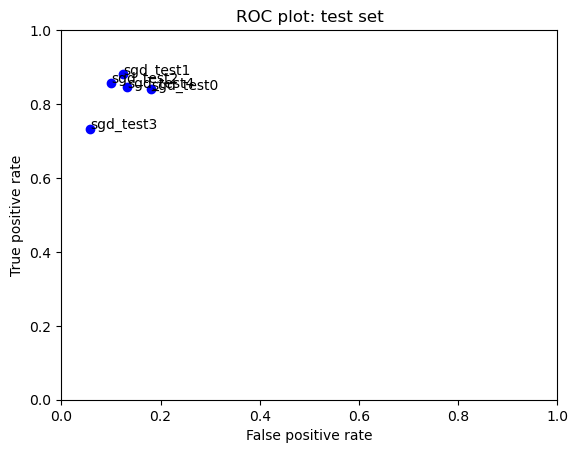

In [10]:
for fit in test_measures:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()